# Student Result Analysis

### Introduction

The "Student Result Analysis" project aims to provide insights into student performance based on various factors. The analysis utilizes Python programming language along with popular data manipulation and visualization libraries such as NumPy, Pandas, Matplotlib, and Seaborn.

# Dataset Overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'Student scores.csv')

# Display basic information about the dataset
print(df.head())
print(df.describe())
print(df.info())
print(df.isnull().sum())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

# Data Cleaning

# Drop unnecessary column

In [ ]:
df = df.drop("Unnamed: 0", axis=1)

In [4]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Exploratory Data Analysis

### 1. Gender Distribution

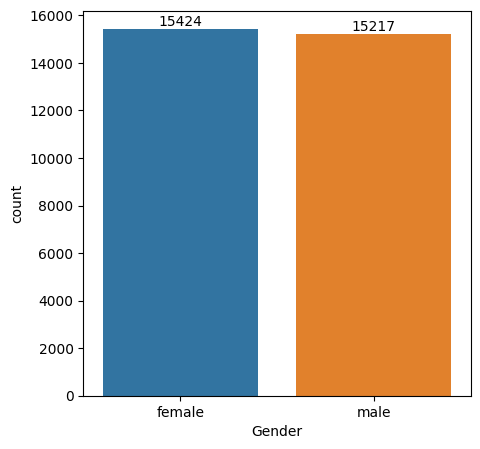

In [18]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=df, x="Gender", hue = "Gender")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

### 2. Parent's Education and Student's Score Relationship

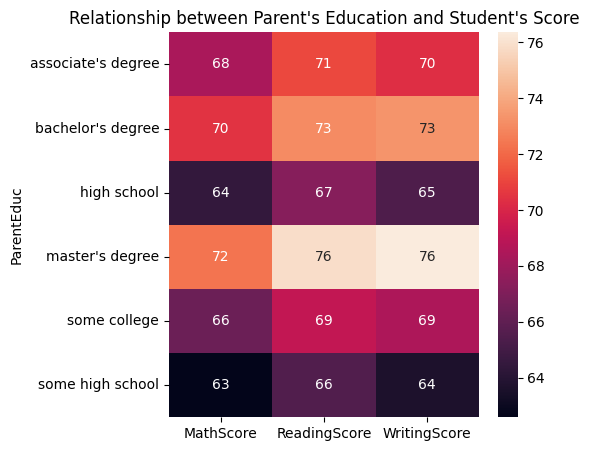

In [8]:
# Group by Parent's Education and calculate mean scores
gb = df.groupby("ParentEduc").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})

# Display a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(gb, annot=True)
plt.title("Relationship between Parent's Education and Student's Score")
plt.show()

### 3. Parent Marital Status and Student's Score Relationship

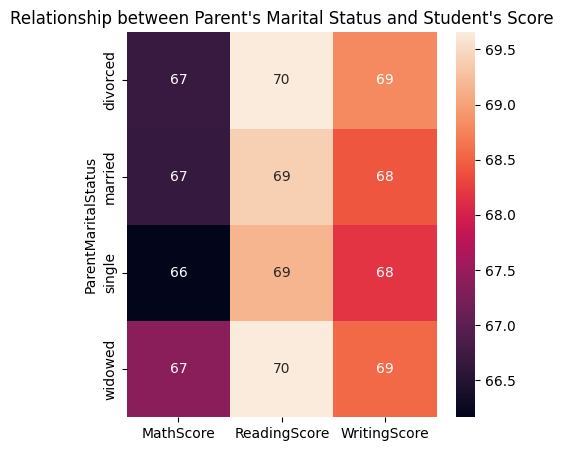

In [9]:
# Group by Parent's Marital Status and calculate mean scores
gb2 = df.groupby("ParentMaritalStatus").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})

# Display a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(gb2, annot=True)
plt.title("Relationship between Parent's Marital Status and Student's Score")
plt.show()

# Detecting Outliers
#### Whats an Outlier?
#### Ans : data points that significantly deviate from the general pattern or distribution of the dataset

### 4. Boxplots for Math, Writing, and Reading Scores

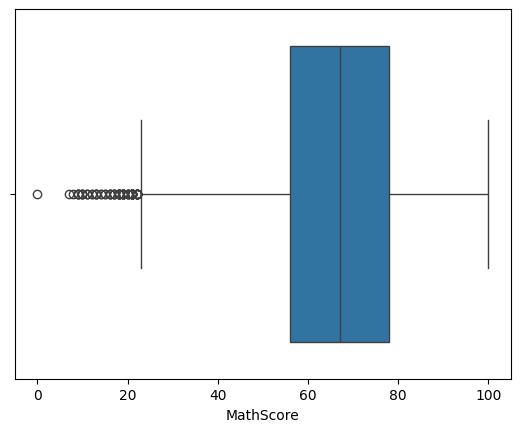

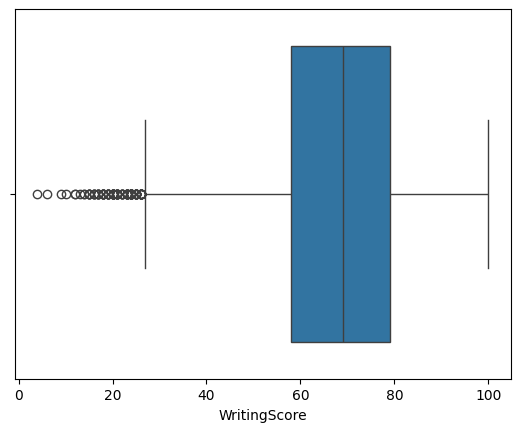

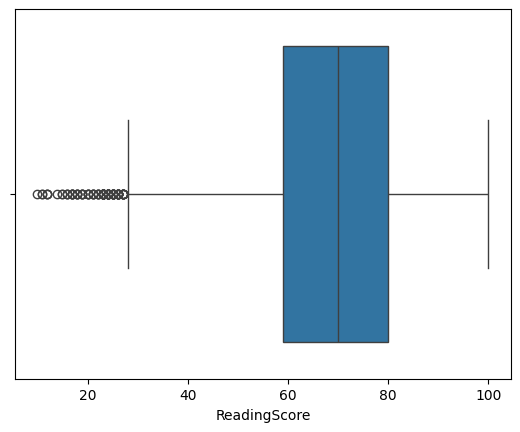

In [10]:

sns.boxplot(data=df, x="MathScore")
plt.show()

sns.boxplot(data=df, x="WritingScore")
plt.show()

sns.boxplot(data=df, x="ReadingScore")
plt.show()

### 5. Distribution of Ethnic Groups

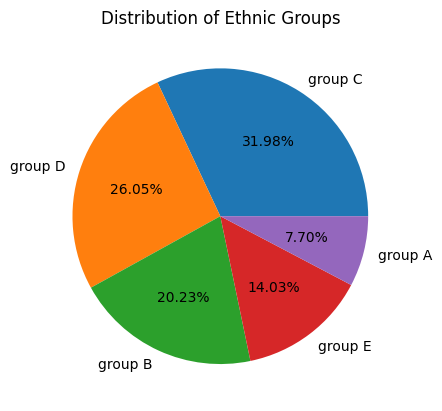

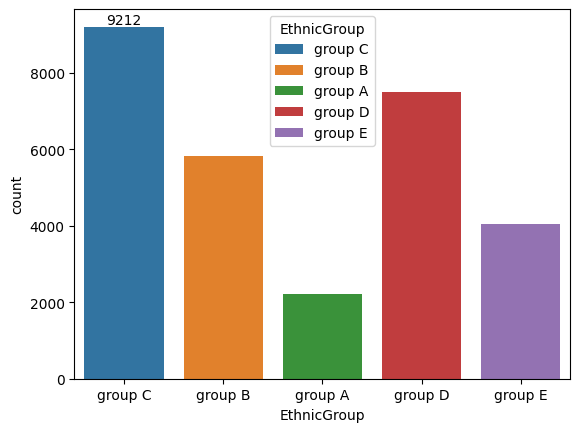

In [22]:
ethnic_counts = df["EthnicGroup"].value_counts()

# Pie chart
plt.pie(ethnic_counts, labels=ethnic_counts.index, autopct="%1.2f%%")
plt.title("Distribution of Ethnic Groups")
plt.show()

# Count plot
ax = sns.countplot(data=df, x="EthnicGroup", hue = 'EthnicGroup')
ax.bar_label(ax.containers[0])
plt.show()

# 6. Gender wise Math score distribution

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


Added a kernel density estimate  providing complementary information about the shape of the distribution

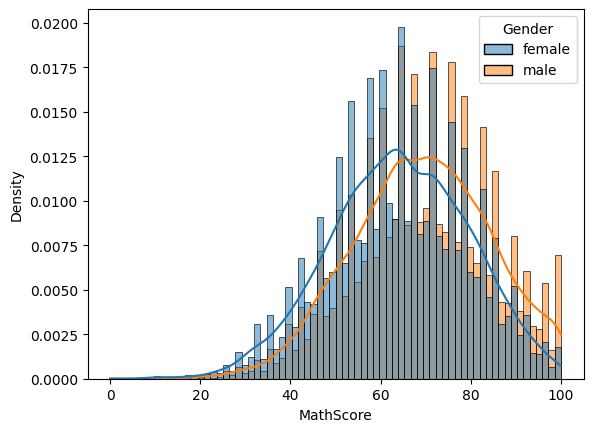

In [39]:
sns.histplot(data=df, x="MathScore", hue="Gender", stat = 'density', kde=True)
plt.show()

# 7. Visualize the distribution of numerical columns using violin plots

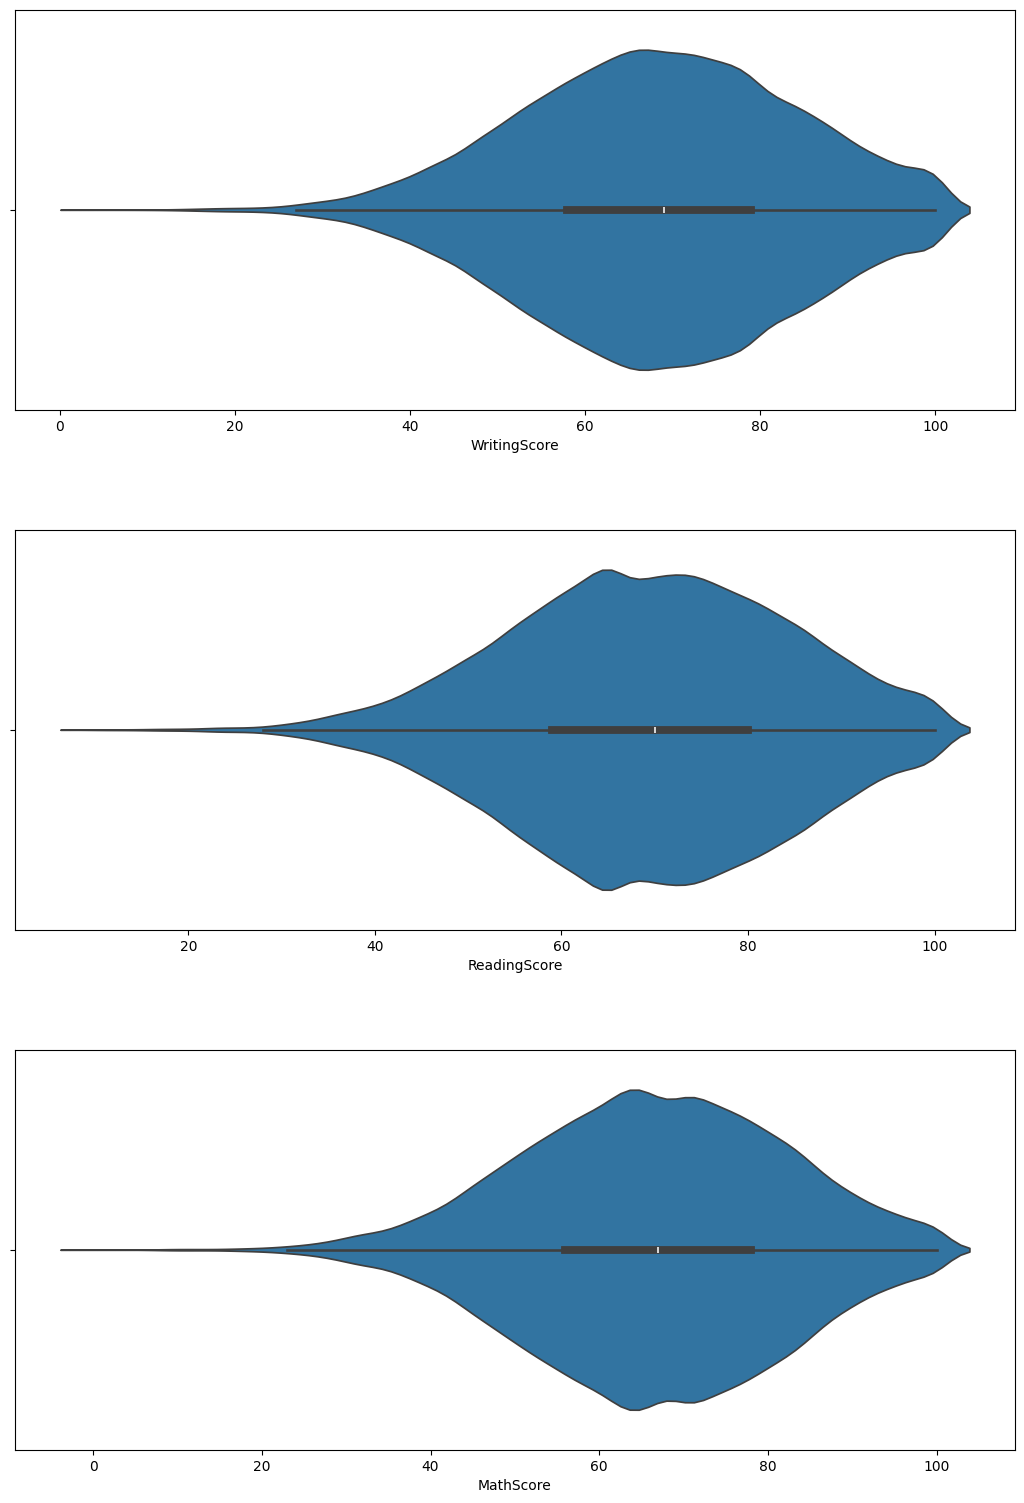

In [44]:
k = 1
canvas = plt.figure(figsize=(10,4))
for i in df.columns[df.dtypes == "int64"]:
    g1 = canvas.add_axes([1,k,1,1])
    sns.violinplot(x = "{}".format(i), data = df)
    k += 1.3